# The Method

The idea of the method is to decopose a function $f$ in terms of a basis of functions $g_j$ and write: 

$$
(1) \ \ f(t) = \sum_{j=1}^\infty a_j g_j(t)
$$

where $a_j$ are the coefficients of the decomposition. Then, compute the derivatives of $f$ by using the relationship above: 

$$
\dfrac{d}{dt}f(t) = \sum_{j=1}^\infty a_j \dfrac{d}{dt}g_t(t).
$$

The basis of functions is fixed in advance, it represents the regularity we assume $f$ has. 

The goal of the method is to estimate the coeficients from a set of observations $\left(t_1, f(t_1)\right), ... , \left(t_n, f(t_n)\right)$ produced by the computer simulation and compute the derivatives by using the equation above.

In our estimation we use a particular set of basis functions called B-Splines [HTF]. A spline of order $k$ with knots $t_1, ... , t_n$ is a piecewise polynomial of order $k$ with the knots above that is continous and has continous derivatives of all orders $1$ through $k-1$.

Because of this constraints the representation of equation (1) becomes finite so for splines we can write:  

$$
f(t) = \sum_{j=1}^N a_j g_j(t)
$$

where $N = n + k + 1$. 

Then, the we can estimate the coefficients by solving the following optimization problem: 

$$
\min_{a_1, .. , a_N} \sum_{j = 1}^n \left( f(t_i) - \sum_{j=1}^N a_j g_j(t_i) \right)^2  + \lambda \sum_{j=1}^N
a_j^2
$$

that can be recasted as a penalized linear regression problem:

$$
\min_{a_1, .. , a_N} \left\| f_n - Ga \right\|_2^2 + \lambda \|a\|_2^2
$$

where $f_n$ is the vector of observations $f(t_j)$, $a$ is the vector of coefficients and $G$ is a $n \times N$ matrix with entries $G_{ij} = g_i(t_j)$. 

We used the Functional Data Analysis R package [fdaR, fdaR Book] to copute the coeffcients. In the method used $\lambda$ is computed using a generalized cross validation. 

- [HTF] Hastie, T., Tibshirani, R. & Friedman, J. (2009), The Elements of Statistical Learning; Data Mining, Inference and Prediction, Springer. Second edition.
- [fdaR] J. O. Ramsay, Hadley Wickham, Spencer Graves and Giles Hooker (2017).
  fda: Functional Data Analysis. R package version 2.4.7.
  https://CRAN.R-project.org/package=fda
- [fdaR Book] Ramsay, J. O. and Silverman, B. W. (2005) Functional Data Analysis. New York: Springer.

In [1]:
library(tidyverse)
library(fda)
library(readr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: splines
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'fda'

The following object is masked from 'package:graphics':

    matplot



In [2]:
citation(package="fda")


To cite package 'fda' in publications use:

  J. O. Ramsay, Hadley Wickham, Spencer Graves and Giles Hooker (2017).
  fda: Functional Data Analysis. R package version 2.4.7.
  https://CRAN.R-project.org/package=fda

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {fda: Functional Data Analysis},
    author = {J. O. Ramsay and Hadley Wickham and Spencer Graves and Giles Hooker},
    year = {2017},
    note = {R package version 2.4.7},
    url = {https://CRAN.R-project.org/package=fda},
  }

ATTENTION: This citation information has been auto-generated from the
package DESCRIPTION file and may need manual editing, see
'help("citation")'.


In [3]:
vel_2dcomp_dat <- read_delim("C:/Users/Personal/functional data analysis/datos nubes fractales/vel/vel_2dcomp.dat.csv", 
                             "\t", escape_double = FALSE, trim_ws = TRUE)

vel_2dsole_dat <- read_delim("C:/Users/Personal/functional data analysis/datos nubes fractales/vel/vel_2dsole.dat.csv", 
                             "\t", escape_double = FALSE, trim_ws = TRUE)

Warning message:
"Duplicated column names deduplicated: 'Vely1' => 'Vely1_1' [3], 'Vely1' => 'Vely1_2' [4], 'Vely1' => 'Vely1_3' [5], 'Vely1' => 'Vely1_4' [6], 'Vely1' => 'Vely1_5' [7], 'Vely1' => 'Vely1_6' [8], 'Vely1' => 'Vely1_7' [9], 'Vely1' => 'Vely1_8' [10], 'Vely1' => 'Vely1_9' [11]"Parsed with column specification:
cols(
  Time = col_double(),
  Vely1 = col_double(),
  Vely1_1 = col_double(),
  Vely1_2 = col_double(),
  Vely1_3 = col_double(),
  Vely1_4 = col_double(),
  Vely1_5 = col_double(),
  Vely1_6 = col_double(),
  Vely1_7 = col_double(),
  Vely1_8 = col_double(),
  Vely1_9 = col_double(),
  MEAN = col_double(),
  STDEV = col_double()
)
Warning message:
"Duplicated column names deduplicated: 'Vely1' => 'Vely1_1' [3], 'Vely1' => 'Vely1_2' [4], 'Vely1' => 'Vely1_3' [5], 'Vely1' => 'Vely1_4' [6], 'Vely1' => 'Vely1_5' [7], 'Vely1' => 'Vely1_6' [8], 'Vely1' => 'Vely1_7' [9], 'Vely1' => 'Vely1_8' [10], 'Vely1' => 'Vely1_9' [11]"Parsed with column specification:
cols(
  Time = 

In [4]:
vel_2dcomp_dat %>% head()
vel_2dsole_dat %>% head()

Time,Vely1,Vely1_1,Vely1_2,Vely1_3,Vely1_4,Vely1_5,Vely1_6,Vely1_7,Vely1_8,Vely1_9,MEAN,STDEV
0.0000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.000000000,0.000000000
0.9999956,0.00932469,0.005746435,0.007333357,0.01351805,0.006695075,0.01094378,0.01235745,0.002617478,0.01114175,0.01269333,0.009237139,0.003537843
1.9998670,0.01768976,0.010300500,0.016231960,0.03134082,0.013642740,0.02340020,0.02643620,0.005572359,0.02263131,0.02687789,0.019412374,0.008127891
2.9999680,0.02502110,0.014704660,0.029059630,0.05173033,0.020749120,0.03665041,0.04506343,0.009720700,0.03665899,0.04346564,0.031282401,0.013780067
3.9998910,0.03221573,0.019219740,0.041670850,0.07408182,0.027766380,0.05156594,0.06420642,0.013719610,0.05483435,0.06190721,0.044118805,0.020404674
4.9997550,0.04036914,0.023824830,0.053797020,0.09540764,0.035618910,0.06731452,0.08237377,0.017647520,0.07626630,0.08310021,0.057571986,0.027218681


Time,Vely1,Vely1_1,Vely1_2,Vely1_3,Vely1_4,Vely1_5,Vely1_6,Vely1_7,Vely1_8,Vely1_9,MEAN,STDEV
0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000000
0.9999329,0.01287656,0.01244836,0.01085997,0.01198412,0.01313223,0.01174082,0.01096397,0.01293076,0.01145792,0.01199692,0.01203916,0.0008053032
1.9996780,0.03104841,0.02579050,0.02330908,0.02417068,0.02847955,0.02338042,0.02142556,0.02804441,0.02543733,0.02529146,0.02563774,0.0028623918
2.9996850,0.05087045,0.04189497,0.03640282,0.03857203,0.04770776,0.03700620,0.03287624,0.04263100,0.03988493,0.03904435,0.04068907,0.0053640489
3.9997090,0.07033461,0.06127390,0.05407103,0.05518334,0.06928731,0.05118983,0.04640884,0.05731922,0.05439380,0.05490769,0.05743696,0.0075588691
4.9999690,0.08864269,0.08332314,0.07410435,0.07315571,0.09186020,0.06928117,0.06260132,0.07394615,0.06935088,0.07612144,0.07623871,0.0091240631


## Choosing a basis

There are some problems at the boundaries. It would be nice to have some extra time before the wave crashes into the cloud (will do this: in fact all the values are the same as at t=0 before the shock).

In [5]:
paddingDf <- function(df, paddMin, paddSize){
    # Padding the training matrix to avoid problems at the boundary
    paddingMat <- matrix(rep(as.matrix(df[1, ]) , each = paddSize), nrow = paddSize, ncol=dim(df)[2])
    padding <- data.frame(paddingMat) 
    names(padding) <- names(df)
    padding <- padding %>% mutate(Time = seq(paddMin, -1, length.out = paddSize))

    df_padd <- rbind(padding, df)
    return(df_padd)
}

In [6]:
paddMin <- -5
paddSize <- 5/0.1 # sample at the same rate as on the data set

vel_2dcomp_dat_train <- paddingDf(vel_2dcomp_dat, paddMin, paddSize)
vel_2dsole_dat_train <- paddingDf(vel_2dsole_dat, paddMin, paddSize)

vel_2dcomp_dat_train %>% tail()
vel_2dsole_dat_train %>% tail()

,Time,Vely1,Vely1_1,Vely1_2,Vely1_3,Vely1_4,Vely1_5,Vely1_6,Vely1_7,Vely1_8,Vely1_9,MEAN,STDEV
146,94.99981,3.305603,3.439641,3.273208,2.607144,2.710774,3.505530,2.394135,1.997093,2.773280,3.175538,2.918195,0.4992280
147,95.99995,3.317073,3.434572,3.311451,2.603643,2.729244,3.515125,2.429407,2.025311,2.803807,3.188936,2.935857,0.4933774
148,96.99994,3.311012,3.436594,3.351379,2.613952,2.756235,3.531222,2.455785,2.028058,2.822226,3.204370,2.951083,0.4934847
149,97.99969,3.310328,3.437161,3.394709,2.626030,2.782913,3.542446,2.478540,2.052671,2.844954,3.220329,2.969008,0.4895313
150,98.99989,3.303622,3.434809,3.434327,2.643134,2.811683,3.568792,2.512360,2.077072,2.872390,3.231362,2.988955,0.4847001
151,99.99995,3.275574,3.426782,3.473660,2.662809,2.837808,3.594176,2.553320,2.098855,2.900494,3.227451,3.005093,0.4770800


,Time,Vely1,Vely1_1,Vely1_2,Vely1_3,Vely1_4,Vely1_5,Vely1_6,Vely1_7,Vely1_8,Vely1_9,MEAN,STDEV
146,94.99982,3.906974,3.499676,3.664017,3.360157,3.335195,3.635641,3.382232,3.928249,3.282876,3.540704,3.553572,0.2297369
147,95.99974,3.925023,3.518656,3.626931,3.349345,3.364970,3.657324,3.426995,3.980100,3.271875,3.549796,3.567102,0.2376050
148,96.99998,3.952063,3.545697,3.591993,3.372993,3.360074,3.676084,3.467410,4.009231,3.279668,3.549421,3.580463,0.2422696
149,97.99989,3.977928,3.575041,3.924176,3.407164,3.372559,3.694399,3.505853,4.014366,3.292652,3.560041,3.632418,0.2608708
150,98.99988,3.982936,3.620774,4.009522,3.438169,3.412071,3.721627,3.551950,4.045972,3.312264,3.573637,3.666892,0.2647894
151,99.99980,3.984718,3.666580,5.139163,3.491694,3.433471,3.742759,3.595183,4.016295,3.337603,3.600885,3.800835,0.5185596


In [7]:
Time <- vel_2dcomp_dat_train$Time
endTime <- Time[length(Time)]
endTime

#basis13 <- create.bspline.basis(c(paddMin, endTime), 13, 6)
basis13 <- create.bspline.basis(c(paddMin, endTime), norder =  6)

[1] 99.99995

In [8]:
vel_2dcomp_dat_train_Mat <- as.matrix(vel_2dcomp_dat_train %>% select(-Time))
smooth_vel_2dcomp <- smooth.basis(argvals = Time, y = vel_2dcomp_dat_train_Mat, basis13)

vel_2dsole_dat_train_Mat <- as.matrix(vel_2dsole_dat_train %>% select(-Time))
smooth_vel_2dsole <- smooth.basis(argvals = Time, y = vel_2dsole_dat_train_Mat, basis13)

In [9]:
smooth_vel_2dcomp

$fd
$coefs
                Vely1     Vely1_1     Vely1_2    Vely1_3     Vely1_4
bspl6.1  0.0009586661 -0.02220629 -0.03040519 -0.0459350 -0.05241639
bspl6.2 -0.0665597031  0.25802615  0.33559287  0.5030326  0.59548871
bspl6.3  0.9329738774 -0.50086295 -0.36331015 -0.3356101 -1.24402102
bspl6.4 -0.0548574953  0.99455524  0.69857779  1.6824320  2.98384480
bspl6.5  3.7125471880  3.64763219  3.02587155  2.8971544  2.40576431
bspl6.6  3.2793735850  3.43167231  3.41457483  2.5925182  2.78332768
            Vely1_5     Vely1_6     Vely1_7     Vely1_8      Vely1_9
bspl6.1  0.01094557 -0.01951222  0.01556858 -0.02267392 -0.003024016
bspl6.2 -0.21389802  0.17574390 -0.18710536  0.21819297 -0.070462042
bspl6.3  1.73153635  0.63780853  0.56767648  0.44031244  1.722619359
bspl6.4  0.73753683  0.69441345  1.80438303  0.27639416  0.797239381
bspl6.5  3.79772023  2.35239869  0.79211950  2.93306944  3.520414924
bspl6.6  3.54325434  2.46918436  2.21893452  2.82329277  3.194262105
               MEAN    

In [10]:
smooth_vel_2dsole

$fd
$coefs
             Vely1     Vely1_1    Vely1_2      Vely1_3     Vely1_4    Vely1_5
bspl6.1 -0.0249091 -0.03276955 -0.0360574  0.004559938  0.01792695 -0.0197126
bspl6.2  0.2611648  0.35491217  0.4245232 -0.066583868 -0.29125928  0.2352683
bspl6.3  0.1137265 -0.23488609 -1.0156762  0.579632845  1.99940025 -0.3069952
bspl6.4  3.0736635  3.90452894  6.9248655  4.288364761  3.70709789  4.1999939
bspl6.5  3.7579429  2.94728298  2.0427429  2.866420880  2.43668994  2.5601455
bspl6.6  3.9906558  3.63697885  4.2664322  3.484480570  3.51314036  3.8130634
            Vely1_6     Vely1_7      Vely1_8     Vely1_9        MEAN
bspl6.1 -0.01497764 -0.01249183 -0.009303726 -0.03322376 -0.01609587
bspl6.2  0.15010893  0.07850758  0.061248211  0.31440251  0.15222925
bspl6.3  0.17906889  0.74873034  0.692237028  0.34856507  0.31038034
bspl6.4  2.60310877  3.07871310  0.852351297  2.06556020  3.46982478
bspl6.5  2.94462033  4.03852316  3.876877509  3.52076256  3.09920087
bspl6.6  3.55232185  3.982094

In [11]:
# Coefficients of the expansion:
coef_vel_2dcomp <- smooth_vel_2dcomp$fd$coefs
coef_vel_2dsole <- smooth_vel_2dsole$fd$coefs

# Evaluating the basis functions on the Time vector. 
basisMat13 <- eval.basis(evalarg = Time, basisobj = basis13)
# Evaluating the first derivatives of the basis functions on the Time vector. 
DbasisMat13 <- eval.basis(evalarg = Time, basisobj = basis13, Lfdobj = 1)

In [12]:
# Predictions:

#comp:
vel_2dcomp_pred <- basisMat13 %*% coef_vel_2dcomp
Dvel_2dcomp_pred <- DbasisMat13 %*% coef_vel_2dcomp

#sole:
vel_2dsole_pred <- basisMat13 %*% coef_vel_2dsole
Dvel_2dsole_pred <- DbasisMat13 %*% coef_vel_2dsole

In [13]:
#comp:
df_vel_2dcomp_pred <- data.frame(vel_2dcomp_pred) %>% mutate(Time = Time) %>% filter(Time >= 0)
df_Dvel_2dcomp_pred <- data.frame(Dvel_2dcomp_pred) %>% mutate(Time = Time) %>% filter(Time >= 0)

#sole:
df_vel_2dsole_pred <- data.frame(vel_2dsole_pred) %>% mutate(Time = Time) %>% filter(Time >= 0)
df_Dvel_2dsole_pred <- data.frame(Dvel_2dsole_pred) %>% mutate(Time = Time) %>% filter(Time >= 0)

In [14]:
#comp:
names(df_Dvel_2dcomp_pred) <-
    c('DVely1', 'DVely1_1', 'DVely1_2', 'DVely1_3', 'DVely1_4',
      'DVely1_5', 'DVely1_6', 'DVely1_7', 'DVely1_8', 'DVely1_9', 'MEAN', 'STDEV', 'Time')

#sole:
names(df_Dvel_2dsole_pred) <-
    c('DVely1', 'DVely1_1', 'DVely1_2', 'DVely1_3', 'DVely1_4',
      'DVely1_5', 'DVely1_6', 'DVely1_7', 'DVely1_8', 'DVely1_9', 'MEAN', 'STDEV', 'Time')

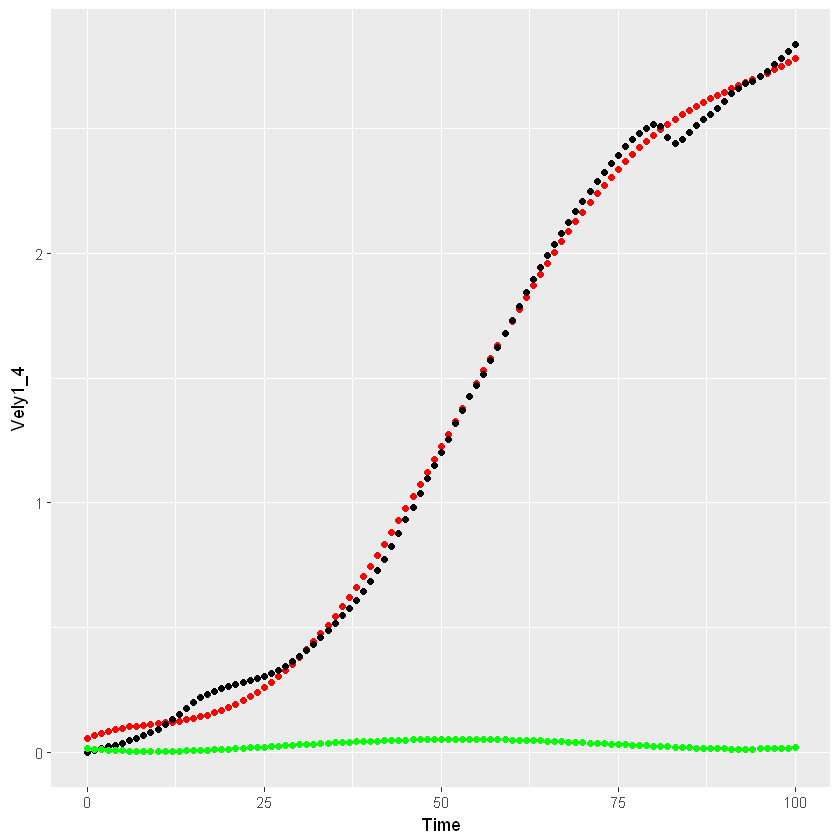

In [15]:
ggplot() + geom_point(data = df_vel_2dcomp_pred, color="red", aes(x=Time, y=Vely1_4)) + 
        geom_point(data = vel_2dcomp_dat, aes(x=Time, y=Vely1_4)) +
        geom_point(data = df_Dvel_2dcomp_pred, color="green", aes(x=Time, y=DVely1_4))

In [16]:
write.table(df_Dvel_2dcomp_pred, file = "Dvel_2dcomp_pred.csv", row.names=FALSE, na="", sep="\t")
write.table(df_Dvel_2dsole_pred, file = "Dvel_2dsole_pred.csv", row.names=FALSE, na="", sep="\t")

# 3d Simulations

In [17]:
vel_3dcomp_dat <- read_delim("C:/Users/Personal/functional data analysis/datos nubes fractales/vel/vel_3dcomp.dat.csv", 
                             "\t", escape_double = FALSE, trim_ws = TRUE)

vel_3dsole_dat <- read_delim("C:/Users/Personal/functional data analysis/datos nubes fractales/vel/vel_3dsole.dat.csv", 
                             "\t", escape_double = FALSE, trim_ws = TRUE)

vel_3dunif_dat <- read_delim("C:/Users/Personal/functional data analysis/datos nubes fractales/vel/vel_3dunif.dat.csv", 
                             "\t", escape_double = FALSE, trim_ws = TRUE)

Parsed with column specification:
cols(
  Time = col_double(),
  Vely1 = col_double()
)
Parsed with column specification:
cols(
  Time = col_double(),
  Vely1 = col_double()
)
Parsed with column specification:
cols(
  Time = col_double(),
  Vely1 = col_double()
)


In [18]:
vel_3dcomp_dat %>% head()
vel_3dsole_dat %>% head()
vel_3dunif_dat %>% head()

Time,Vely1
0.0000000,0.000000000
0.1993841,0.002789631
0.3996075,0.005307214
0.5999047,0.007918889
0.7996006,0.010502920
0.9997583,0.013111410


Time,Vely1
0.0000000,0.000000000
0.1999570,0.003017954
0.3996535,0.005313764
0.5996341,0.007628027
0.7997605,0.009983561
0.9994731,0.012416140


Time,Vely1
0.0000000,0.000000000
0.1997424,0.003023252
0.3997191,0.005119898
0.5995056,0.007230333
0.7999675,0.009380329
0.9993074,0.011570870


In [19]:
paddMin <- -5
paddSize <- 5/0.1 # sample at the same rate as on the data set

vel_3dcomp_dat_train <- paddingDf(vel_3dcomp_dat, paddMin, paddSize)
vel_3dsole_dat_train <- paddingDf(vel_3dsole_dat, paddMin, paddSize)
vel_3dunif_dat_train <- paddingDf(vel_3dunif_dat, paddMin, paddSize)


vel_3dcomp_dat_train %>% tail()
vel_3dsole_dat_train %>% tail()
vel_3dunif_dat_train %>% tail()

,Time,Vely1
225,34.79996,1.058991
226,34.99986,1.064753
227,35.19955,1.069511
228,35.39943,1.071765
229,35.59981,1.072966
230,35.79993,1.074388


,Time,Vely1
205,30.79955,1.799943
206,30.99951,1.819085
207,31.19969,1.837194
208,31.40000,1.854042
209,31.59936,1.869810
210,31.79980,1.886094


,Time,Vely1
245,38.79995,0.9617493
246,38.99936,0.9739731
247,39.19934,0.9860659
248,39.39960,0.9977769
249,39.59958,1.0090380
250,39.79983,1.0195740


In [20]:
TimeComp <- vel_3dcomp_dat_train$Time
endTimeComp <- TimeComp[length(TimeComp)]
endTimeComp

#basis13Comp <- create.bspline.basis(c(paddMin, endTimeComp), 13, 6)
basis13Comp <- create.bspline.basis(c(paddMin, endTimeComp), norder =  6)

vel_3dcomp_dat_train_Mat <- as.matrix(vel_3dcomp_dat_train %>% select(-Time))
smooth_vel_3dcomp <- smooth.basis(argvals = TimeComp, y = vel_3dcomp_dat_train_Mat, basis13Comp)

[1] 35.79993

In [21]:
TimeSole <- vel_3dsole_dat_train$Time
endTimeSole <- TimeSole[length(TimeSole)]
endTimeSole

#basis13Sole <- create.bspline.basis(c(paddMin, endTimeSole), 13, 6)
basis13Sole <- create.bspline.basis(c(paddMin, endTimeSole), norder =  6)

vel_3dsole_dat_train_Mat <- as.matrix(vel_3dsole_dat_train %>% select(-Time))
smooth_vel_3dsole <- smooth.basis(argvals = TimeSole, y = vel_3dsole_dat_train_Mat, basis13Sole)

[1] 31.7998

In [22]:
TimeUnif <- vel_3dunif_dat_train$Time
endTimeUnif <- TimeUnif[length(TimeUnif)]
endTimeUnif

#basis13Unif <- create.bspline.basis(c(paddMin, endTimeUnif), 13, 6)
basis13Unif <- create.bspline.basis(c(paddMin, endTimeUnif), norder = 6)

vel_3dunif_dat_train_Mat <- as.matrix(vel_3dunif_dat_train %>% select(-Time))
smooth_vel_3dunif <- smooth.basis(argvals = TimeUnif, y = vel_3dunif_dat_train_Mat, basis13Unif)

[1] 39.79983

In [23]:
# Coefficients of the expansion:
coef_vel_3dcomp <- smooth_vel_3dcomp$fd$coefs
coef_vel_3dsole <- smooth_vel_3dsole$fd$coefs
coef_vel_3dunif <- smooth_vel_3dunif$fd$coefs

# Evaluating the basis functions on the Time vector. 
basisMat13Comp <- eval.basis(evalarg = TimeComp, basisobj = basis13Comp)
basisMat13Sole <- eval.basis(evalarg = TimeSole, basisobj = basis13Sole)
basisMat13Unif <- eval.basis(evalarg = TimeUnif, basisobj = basis13Unif)

# Evaluating the first derivatives of the basis functions on the Time vector. 
DbasisMat13Comp <- eval.basis(evalarg = TimeComp, basisobj = basis13Comp, Lfdobj = 1)
DbasisMat13Sole <- eval.basis(evalarg = TimeSole, basisobj = basis13Sole, Lfdobj = 1)
DbasisMat13Unif <- eval.basis(evalarg = TimeUnif, basisobj = basis13Unif, Lfdobj = 1)

In [24]:
# Predictions:

#comp:
vel_3dcomp_pred <- basisMat13Comp %*% coef_vel_3dcomp
Dvel_3dcomp_pred <- DbasisMat13Comp %*% coef_vel_3dcomp
df_vel_3dcomp_pred <- data.frame(vel_3dcomp_pred) %>% mutate(Time = TimeComp) %>% filter(Time >= 0)
df_Dvel_3dcomp_pred <- data.frame(Dvel_3dcomp_pred) %>% mutate(Time = TimeComp) %>% filter(Time >= 0)

#sole:
vel_3dsole_pred <- basisMat13Sole %*% coef_vel_3dsole
Dvel_3dsole_pred <- DbasisMat13Sole %*% coef_vel_3dsole
df_vel_3dsole_pred <- data.frame(vel_3dsole_pred) %>% mutate(Time = TimeSole) %>% filter(Time >= 0)
df_Dvel_3dsole_pred <- data.frame(Dvel_3dsole_pred) %>% mutate(Time = TimeSole) %>% filter(Time >= 0)

#unif:
vel_3dunif_pred <- basisMat13Unif %*% coef_vel_3dunif
Dvel_3dunif_pred <- DbasisMat13Unif %*% coef_vel_3dunif
df_vel_3dunif_pred <- data.frame(vel_3dunif_pred) %>% mutate(Time = TimeUnif) %>% filter(Time >= 0)
df_Dvel_3dunif_pred <- data.frame(Dvel_3dunif_pred) %>% mutate(Time = TimeUnif) %>% filter(Time >= 0)

In [25]:
#comp:
names(df_vel_3dcomp_pred) <- c('Vely1', 'Time')
names(df_Dvel_3dcomp_pred) <- c('DVely1', 'Time')

#sole:
names(df_vel_3dsole_pred) <- c('Vely1', 'Time')
names(df_Dvel_3dsole_pred) <- c('DVely1', 'Time')

#unif:
names(df_vel_3dunif_pred) <- c('Vely1', 'Time')
names(df_Dvel_3dunif_pred) <- c('DVely1', 'Time')

In [26]:
df_vel_3dcomp_pred %>% head()
vel_3dcomp_dat %>% head()

Vely1,Time
0.003164743,0.0000000
0.005275521,0.1993841
0.007552736,0.3996075
0.009984166,0.5999047
0.012556512,0.7996006
0.015278880,0.9997583


Time,Vely1
0.0000000,0.000000000
0.1993841,0.002789631
0.3996075,0.005307214
0.5999047,0.007918889
0.7996006,0.010502920
0.9997583,0.013111410


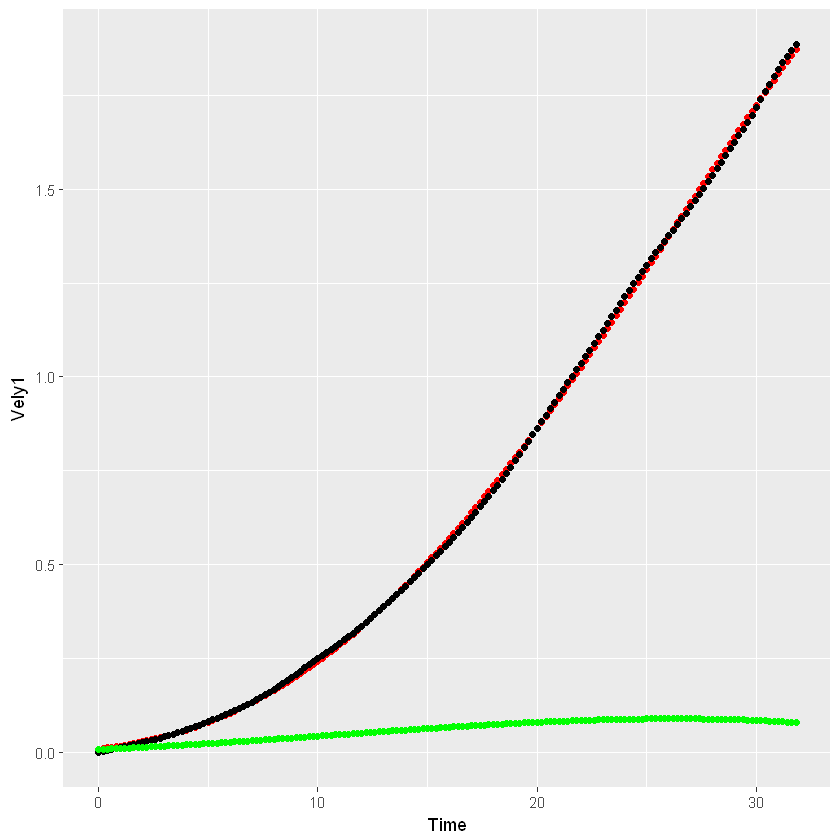

In [27]:
ggplot() + geom_point(data = df_vel_3dsole_pred, color="red", aes(x=Time, y=Vely1)) + 
        geom_point(data = vel_3dsole_dat, aes(x=Time, y=Vely1)) +
        geom_point(data = df_Dvel_3dsole_pred, color="green", aes(x=Time, y=DVely1))

In [28]:
write.table(df_Dvel_3dcomp_pred, file = "Dvel_3dcomp_pred.csv", row.names=FALSE, na="", sep="\t")
write.table(df_Dvel_3dsole_pred, file = "Dvel_3dsole_pred.csv", row.names=FALSE, na="", sep="\t")
write.table(df_Dvel_3dunif_pred, file = "Dvel_3dunif_pred.csv", row.names=FALSE, na="", sep="\t")